In [28]:
import locale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [29]:
#Read data from a csv file
df = pd.read_csv('/content/drive/MyDrive/Urban Air Quality and Health Impact Dataset.csv')

In [30]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [31]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (1000, 46)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
datetime,object,0,0.000,0,15,1000,NaN,NaN,NaN,NaN,2024-09-07,2024-09-08,2024-09-09
datetimeEpoch,float64,0,0.000,0,895,1000,1725624158.923312,1727021426.427024,1726284302.824003,374583.376919,1725692400.0,1725778800.0,1725865200.0
tempmax,float64,0,0.000,0,951,1000,62.035432,107.7974,85.106961,9.524231,106.1,103.9,105.0
tempmin,float64,0,0.000,0,948,1000,49.108218,91.635546,68.641638,8.474102,91.0,87.0,83.9
temp,float64,0,0.000,0,970,1000,55.548415,99.851684,76.115967,8.72207,98.5,95.4,94.7
feelslikemax,float64,0,0.000,0,962,1000,62.206413,105.06017,85.195384,9.496951,104.0,100.5,99.9
feelslikemin,float64,0,0.000,0,951,1000,48.834041,89.369854,68.547548,8.365809,88.1,84.7,81.6
feelslike,float64,0,0.000,0,971,1000,57.748822,98.193984,76.323286,8.621361,95.9,92.3,90.6
dew,float64,0,0.000,0,972,1000,26.261814,76.648668,57.26712,9.161517,51.5,48.7,41.7
humidity,float64,0,0.000,0,978,1000,11.752135,92.459293,56.782281,16.708667,21.0,21.5,16.9


In [32]:
#We will exclude columns that have only 1 data type and/or a very large percentage of null data.

df.drop(["preciptype", "snow", "snowdepth", "Condition_Code", "Month", "Season", "stations"], axis=1, inplace=True)

In [33]:
# Check if there is still null data
df.isna().sum().sum()

0

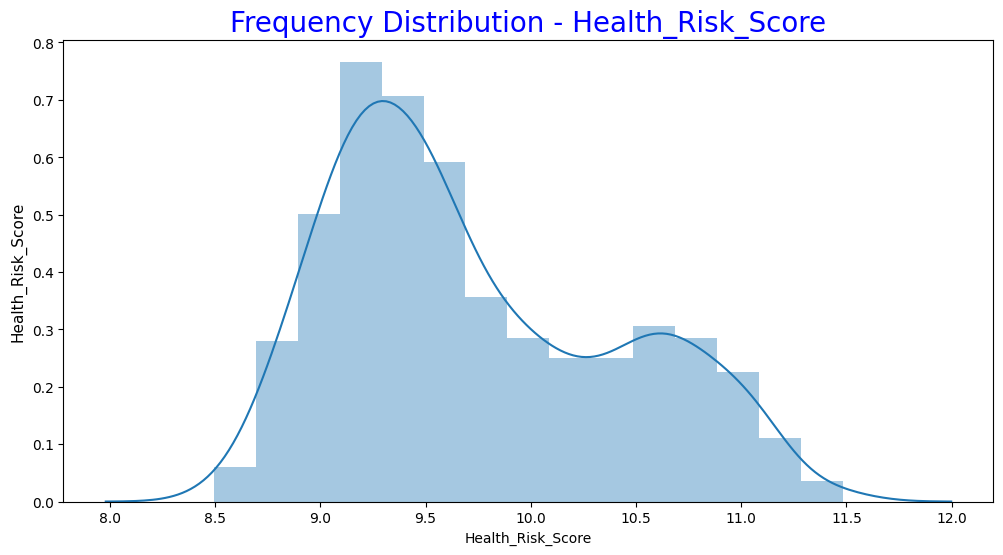

In [7]:
# Histogram - 'Health_Risk_Score'
ax = sns.distplot(df['Health_Risk_Score'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Health_Risk_Score', fontsize=20, color = "blue")
ax.set_ylabel('Health_Risk_Score', fontsize=11)
plt.show()

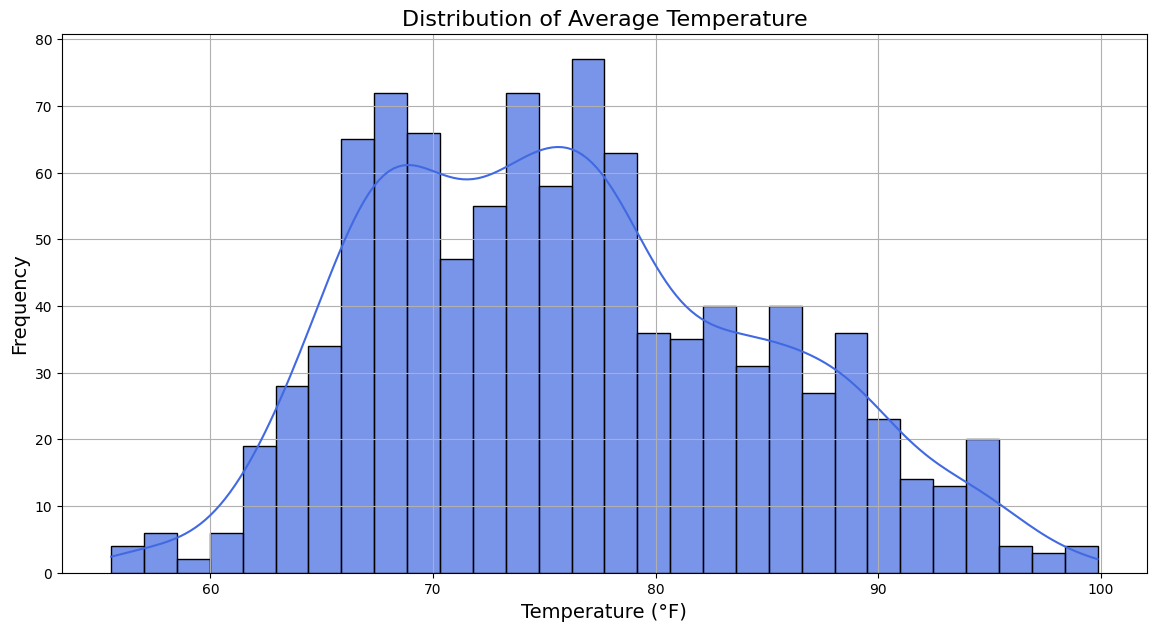

In [8]:
# Distribution of Average Temperature
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.histplot(df['temp'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.7) # Changed df to data
plt.title('Distribution of Average Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [23]:
# # Convert datetime column to datetime type
# df['datetime'] = pd.to_datetime(df['datetime']) # Changed df to data

# # Temperature Trends Over Time
# plt.figure(figsize=(14, 8))
# df_grouped = df.groupby(df['datetime'].dt.date).agg({'temp': 'mean'}).reset_index() # Changed df to data
# sns.lineplot(x='datetime', y='temp', data=df_grouped, color='firebrick', linewidth=2.5, marker='o')
# plt.title('Temperature Trends Over Time', fontsize=16)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Average Temperature (°F)', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()



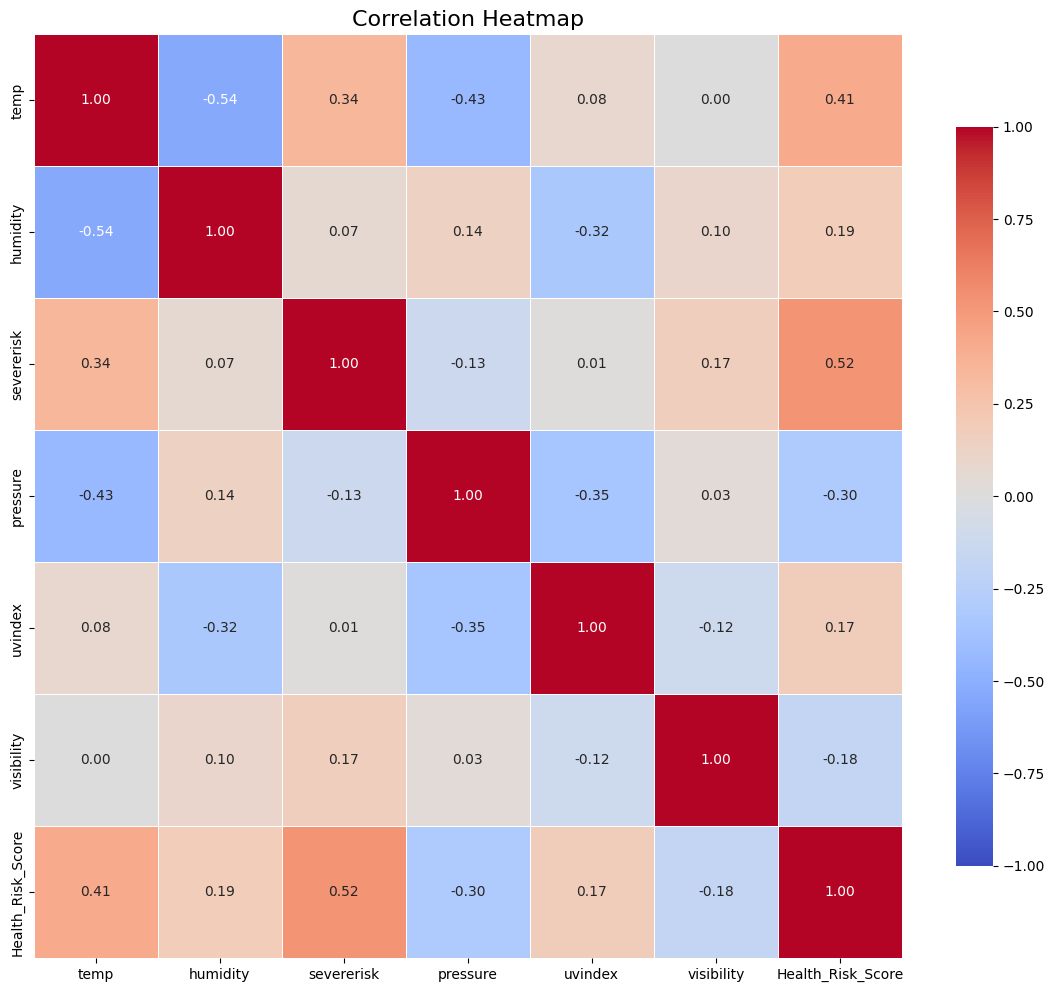

In [9]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = df[['temp', 'humidity', 'severerisk', 'pressure', 'uvindex', 'visibility', 'Health_Risk_Score']].corr() # Assuming your DataFrame is named 'data' based on previous code
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

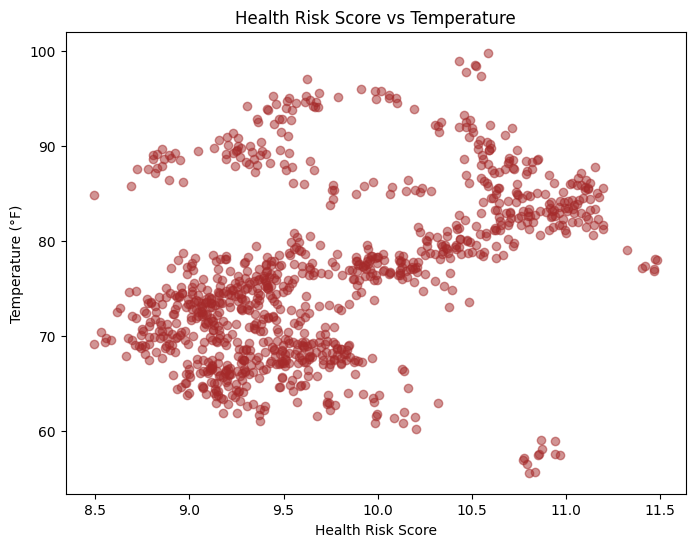

In [14]:
# Scatter plot for Health Risk Score vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['Health_Risk_Score'], df['temp'], alpha=0.5, color='brown')
plt.title('Health Risk Score vs Temperature')
plt.xlabel('Health Risk Score')
plt.ylabel('Temperature (°F)')
plt.show()


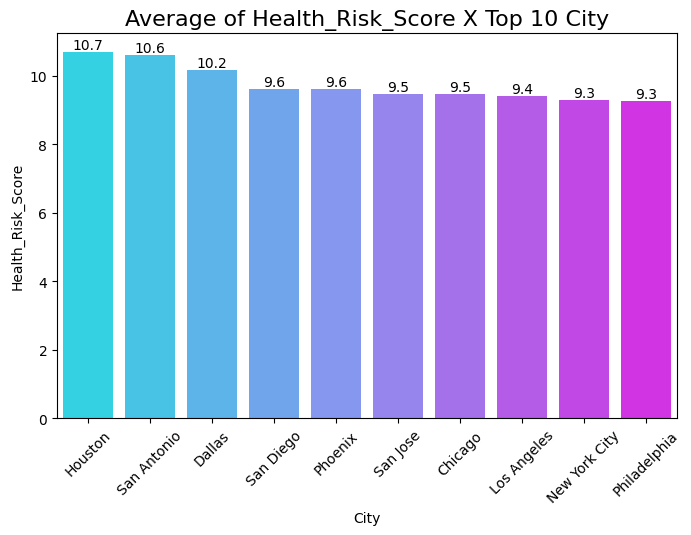

In [15]:
# Average of Health_Risk_Score X Top 10 City
df_cat = df.groupby('City')["Health_Risk_Score"].mean().reset_index()
df_cat = df_cat.sort_values(by='Health_Risk_Score', ascending=False).head(10)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = 'City', y = "Health_Risk_Score", data = df_cat, palette = 'cool')
plt.title("Average of Health_Risk_Score X Top 10 City", fontsize = 16)
plt.xticks(rotation=45, fontsize = 10)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points', rotation=0, fontsize=10)

plt.show()

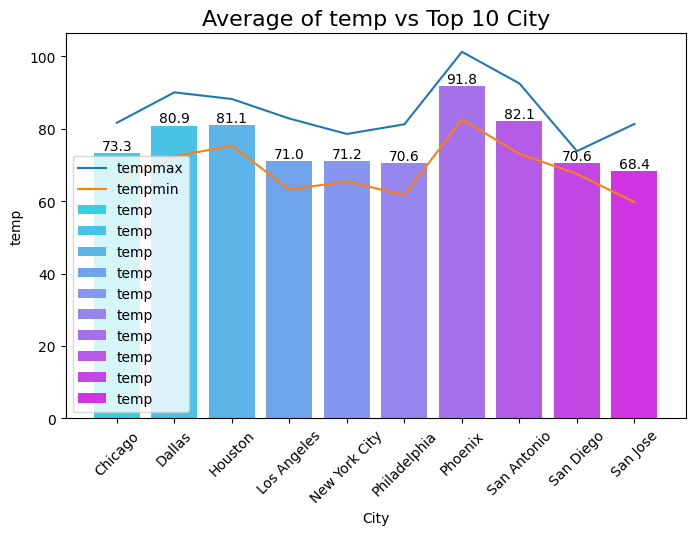

In [16]:
# Average of Health_Risk_Score X Top 10 City
df_cat = df.groupby('City')[["tempmin", "temp", "tempmax"]].mean().reset_index()
#df_cat = df_cat.sort_values(by='temp', ascending=False).head(10)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = 'City', y = "temp", data = df_cat, palette = 'cool', label = "temp")
ax = sns.lineplot(x = 'City', y = "tempmax", data = df_cat, label = "tempmax")
ax = sns.lineplot(x = 'City', y = "tempmin", data = df_cat, label = "tempmin")

plt.title("Average of temp vs Top 10 City", fontsize = 16)
plt.xticks(rotation=45, fontsize = 10)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points', rotation=0, fontsize=10)

plt.show()

In [34]:
# Convert non-numeric columns to numeric ones.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le= LabelEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

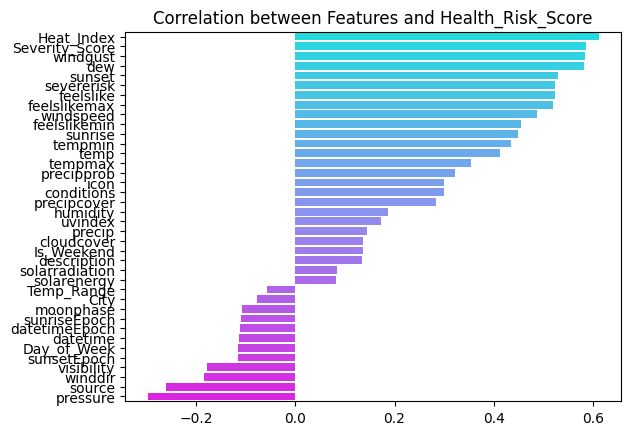

In [35]:
# Correlation with Health_Risk_Score

limite = -1

data = df.corr()["Health_Risk_Score"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limite:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels, palette = 'cool')
plt.title('Correlation between Features and Health_Risk_Score')
plt.show()

In [36]:
df.drop(["datetime", "datetimeEpoch", "feelslike", "precip", "precipprob", "precipcover", "windgust", "winddir", "solarenergy", "sunrise", "sunriseEpoch", "sunset", "sunsetEpoch", "moonphase", "conditions", "description", "icon", "source", "Day_of_Week", "Is_Weekend"], axis=1, inplace=True)

In [37]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,dew,humidity,windspeed,pressure,cloudcover,visibility,solarradiation,uvindex,severerisk,City,Temp_Range,Heat_Index,Severity_Score,Health_Risk_Score
0,106.1,91.0,98.5,104.0,88.1,51.5,21.0,13.7,1009.2,25.0,10.0,261.4,9.0,10.0,6,15.1,95.918703,4.4300,10.522170
1,103.9,87.0,95.4,100.5,84.7,48.7,21.5,12.8,1008.8,13.5,10.1,293.3,9.0,10.0,6,16.9,92.281316,3.8800,10.062332
2,105.0,83.9,94.7,99.9,81.6,41.7,16.9,10.3,1009.4,6.2,10.1,327.0,9.0,10.0,6,21.1,90.599165,3.6300,9.673387
3,106.1,81.2,93.9,100.6,79.5,39.1,15.7,5.4,1006.8,4.9,12.5,276.8,9.0,10.0,6,24.9,89.638811,2.8512,9.411519
4,106.1,82.1,94.0,101.0,80.0,40.1,15.9,8.1,1001.8,5.7,15.0,274.9,9.0,10.0,6,24.0,89.760414,3.3908,9.515179


In [38]:
print(df.iloc[0])


tempmax               106.100000
tempmin                91.000000
temp                   98.500000
feelslikemax          104.000000
feelslikemin           88.100000
dew                    51.500000
humidity               21.000000
windspeed              13.700000
pressure             1009.200000
cloudcover             25.000000
visibility             10.000000
solarradiation        261.400000
uvindex                 9.000000
severerisk             10.000000
City                    6.000000
Temp_Range             15.100000
Heat_Index             95.918703
Severity_Score          4.430000
Health_Risk_Score      10.522170
Name: 0, dtype: float64


In [39]:
# Assuming your DataFrame is `df` and you want to exclude the target column
feature_columns = df.columns[:-1]  # This will give you all feature columns except the last column (target)
print(feature_columns)


Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'dew',
       'humidity', 'windspeed', 'pressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'severerisk', 'City', 'Temp_Range',
       'Heat_Index', 'Severity_Score'],
      dtype='object')


In [40]:
print(df.dtypes)

tempmax              float64
tempmin              float64
temp                 float64
feelslikemax         float64
feelslikemin         float64
dew                  float64
humidity             float64
windspeed            float64
pressure             float64
cloudcover           float64
visibility           float64
solarradiation       float64
uvindex              float64
severerisk           float64
City                   int64
Temp_Range           float64
Heat_Index           float64
Severity_Score       float64
Health_Risk_Score    float64
dtype: object


In [55]:
# Prepare data for modeling
X = df.drop(['Health_Risk_Score'], axis=1)
y = df['Health_Risk_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [60]:
#Random Forest

# Define model
rf = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Make predictions
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Parameters for random forest: {grid_search.best_params_}")
print(f"Mean Squared Error for random forest: {mse_rf}")
print(f"R-squared for random forest: {r2_rf}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for random forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error for random forest: 0.012987447075691822
R-squared for random forest: 0.9673616580895258


In [61]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scaling the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define model
lr = LinearRegression()

# Define parameter grid (without 'normalize' parameter)
param_grid = {
    'fit_intercept': [True, False],  # We can still tune whether to fit the intercept
    'positive': [True, False]        # This ensures coefficients are non-negative if set to True
}

# Perform grid search
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Make predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Best Parameters for Linear Regression: {grid_search_lr.best_params_}")
print(f"Mean Squared Error for Linear Regression: {mse_lr}")
print(f"R-squared for Linear Regression: {r2_lr}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Mean Squared Error for Linear Regression: 0.013383742804472356
R-squared for Linear Regression: 0.9663657398449149


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the Decision Tree model
dt = DecisionTreeRegressor()

# Define parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Perform grid search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Make predictions using the best estimator from grid search
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Mean Squared Error for Decision Tree: {mse_dt}")
print(f"R-squared for Decision Tree: {r2_dt}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters for Decision Tree: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error for Decision Tree: 0.02552257066645116
R-squared for Decision Tree: 0.9358600360031496


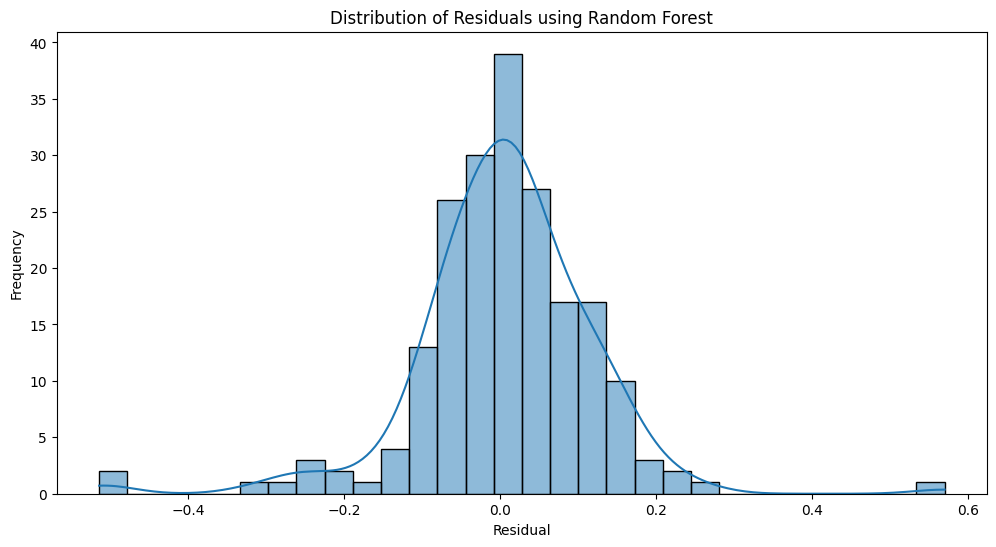

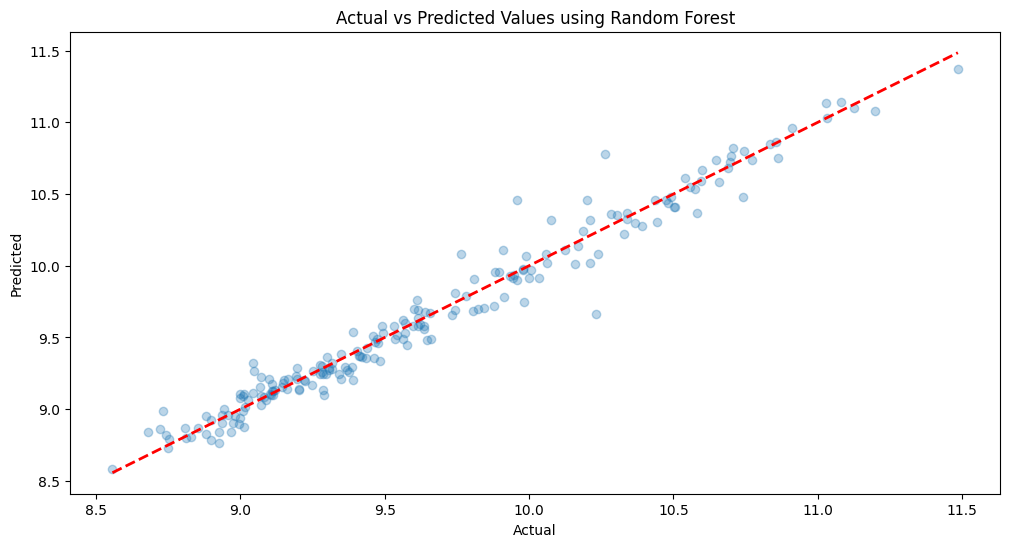

In [63]:
 # Calculate residuals for Random Forest
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals using Random Forest')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values using Random Forest')
plt.show()

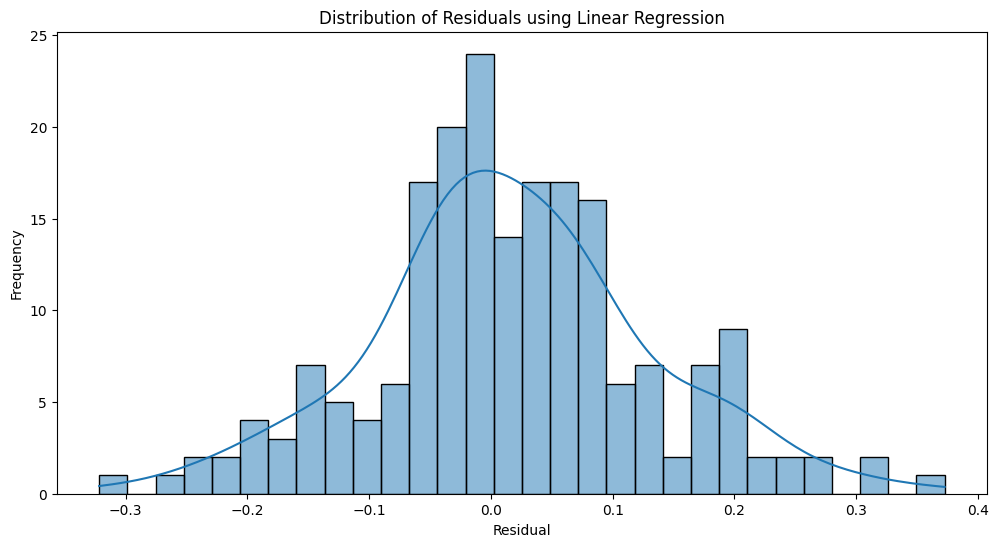

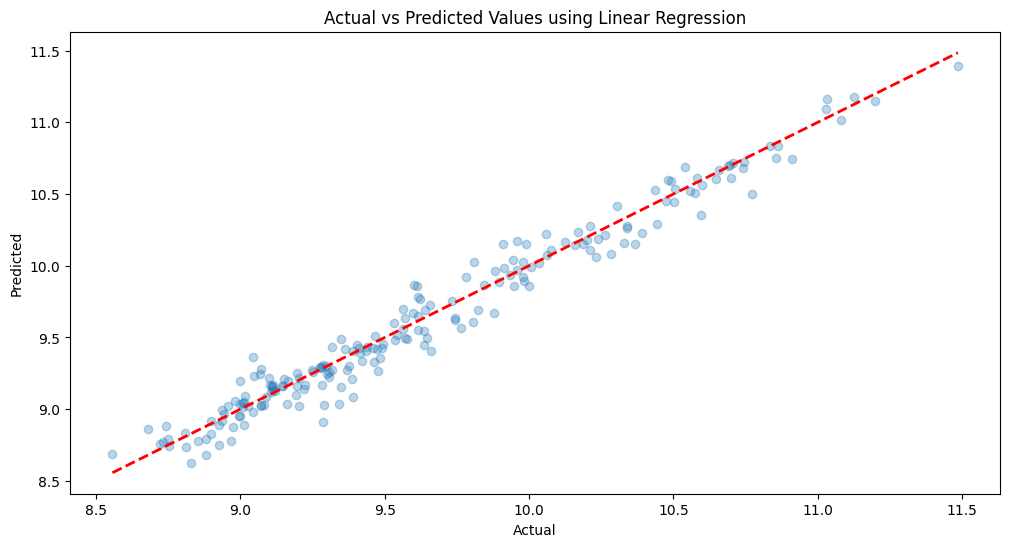

In [64]:
 # Calculate residuals for linear regression
residuals = y_test - y_pred_lr

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals using Linear Regression')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values using Linear Regression')
plt.show()

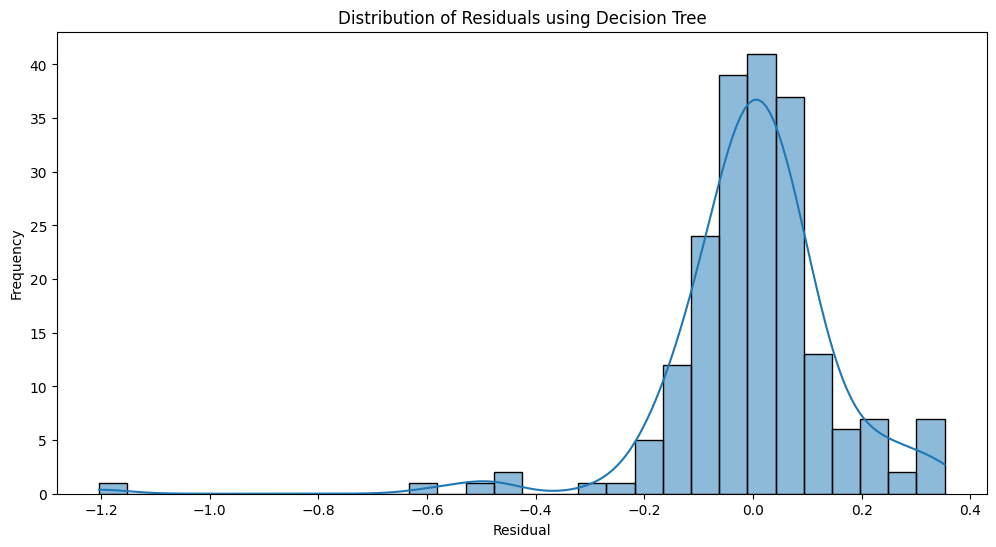

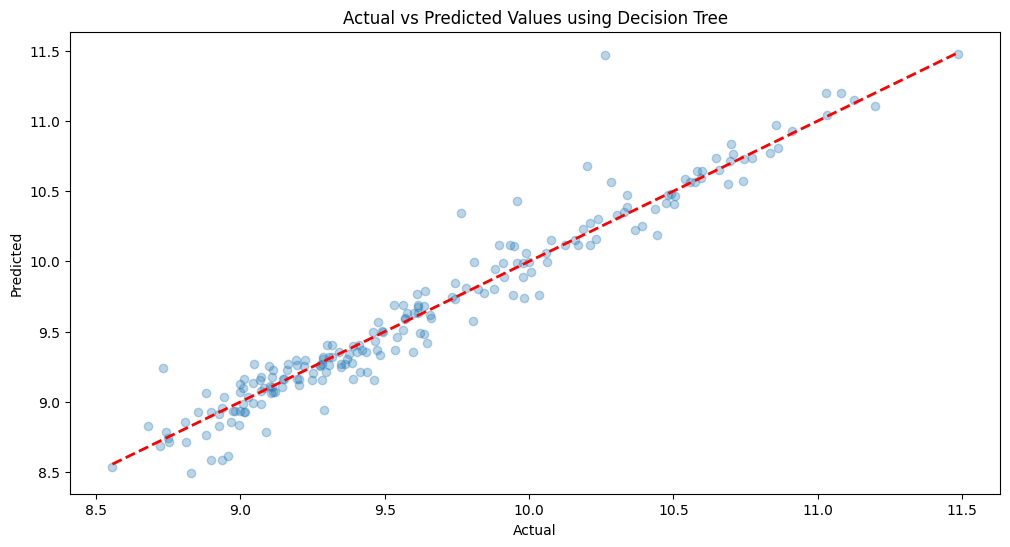

In [65]:
 # Calculate residuals for Decision Tree
residuals = y_test - y_pred_dt

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals using Decision Tree')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values using Decision Tree')
plt.show()

In [66]:
# Perform cross-validation linear regression
cv_scores = cross_val_score(best_lr, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores for Linear Regression: {cv_scores}")
print(f"Mean R-squared score for Linear Regression: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores for Linear Regression: {cv_scores.std()}")

Cross-validation R-squared scores for Linear Regression: [0.98200858 0.96587554 0.96628457 0.96648493 0.96448248]
Mean R-squared score for Linear Regression: 0.9690272196253062
Standard deviation of R-squared scores for Linear Regression: 0.006528227375575902


In [69]:
# Perform cross-validation random forest
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores for Random Forest: {cv_scores}")
print(f"Mean R-squared score for Random Forest: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores for Random Forest: {cv_scores.std()}")

Cross-validation R-squared scores for Random Forest: [0.98699511 0.9546584  0.97921484 0.9814624  0.96576676]
Mean R-squared score for Random Forest: 0.9736195027282708
Standard deviation of R-squared scores for Random Forest: 0.011772125471360242


In [70]:
# Perform cross-validation Decision Tree
cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores for Decision Tree: {cv_scores}")
print(f"Mean R-squared score for Decision Tree: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores for Decision Tree: {cv_scores.std()}")

Cross-validation R-squared scores for Decision Tree: [0.9676371  0.92195118 0.95195983 0.95347043 0.92683113]
Mean R-squared score for Decision Tree: 0.9443699326491378
Standard deviation of R-squared scores for Decision Tree: 0.01727423783796264


In [71]:
import pickle

In [72]:
pickle.dump(best_lr,open('regmodel.pkl','wb'))

In [73]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [74]:
feature_columns = df.columns[:-1]

In [75]:
## Prediction
pickled_model.predict(scaler.transform(df[feature_columns].iloc[0].values.reshape(1, -1)))

array([10.81159946])